The point of this is to illustrate how timeseries differencing works

read about this [here](https://machinelearningmastery.com/remove-trends-seasonality-difference-transform-python/)

t test for removing trend only
Ttest_1sampResult(statistic=0.6204924718314785, pvalue=0.5378687192950673)

t test for removing monthly seasonality only
Ttest_1sampResult(statistic=64.08903256020126, pvalue=1.6048533830967184e-39)

t test for removing both trend and monthly seasonality
Ttest_1sampResult(statistic=-0.07016170161610981, pvalue=0.9444532626362614)


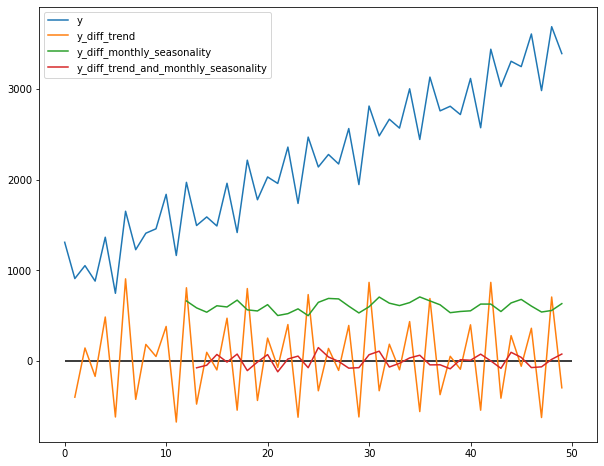

In [40]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp
np.random.seed(1)

# setup timeseries that takes form:
# intercept + t*linear_trend + month_seasonality + residuals
n = 50
df = pd.DataFrame({'t': np.arange(n)})
df['month'] = (df['t'] % 12) + 1
seasonal = pd.DataFrame(np.random.normal(0, 200, 12)).reset_index()\
.rename(columns={'index': 'month', 0: 's'})
seasonal['month'] += 1
df = df.merge(seasonal, on='month').sort_values('t')
df['r'] = np.random.normal(0, 50, n)
df['y'] = 1000 + df['t']*50 + df['s'] + df['r']

fig, ax = plt.subplots(figsize=(10, 8))

ax.hlines(0, 0, len(df))
ax.plot(df['t'], df['y'], label='y')

# remove trend
df['y_diff_trend'] = df['y'] - df['y'].shift(periods=1)
ax.plot(df['t'], df['y_diff_trend'], label='y_diff_trend')
print('t test for removing trend only')
print(ttest_1samp(df.dropna().y_diff_trend.values, 0))

# remove monthly season 
# this also removes trend because there is a trend materializing over 12 months
df['y_diff_monthly_seasonality'] = df['y'] - df['y'].shift(periods=12)
ax.plot(df['t'], df['y_diff_monthly_seasonality'], label='y_diff_monthly_seasonality')
print('\nt test for removing monthly seasonality only')
print(ttest_1samp(df.dropna().y_diff_monthly_seasonality.values, 0))

# remove month and season
df['y_diff_tms'] = df['y'] - df['y'].shift(1)
df['y_diff_tms'] = df['y_diff_tms'] - df['y_diff_tms'].shift(12)
ax.plot(df['t'], df['y_diff_tms'], label='y_diff_trend_and_monthly_seasonality')
print('\nt test for removing both trend and monthly seasonality')
print(ttest_1samp(df.dropna().y_diff_tms.values, 0))

plt.legend()
plt.show()

In [12]:
ttest_1samp(df.dropna().y_diff.values, 0)

Ttest_1sampResult(statistic=-0.6204924718314785, pvalue=0.5378687192950673)

t test for removing trend only
Ttest_1sampResult(statistic=9.683277173616302, pvalue=2.6424517738136123e-11)

t test for removing trend order 2 only
Ttest_1sampResult(statistic=1.1296513895393414, pvalue=0.2665301263493931)

t test for removing trend order 3 only
Ttest_1sampResult(statistic=-0.13000313328878518, pvalue=0.8973300514479977)

t test for removing monthly seasonality only
Ttest_1sampResult(statistic=8.641984394852154, pvalue=4.2606160941871895e-10)

t test for removing both trend order 2 and monthly seasonality
Ttest_1sampResult(statistic=0.02907691037839471, pvalue=0.97697326066213)


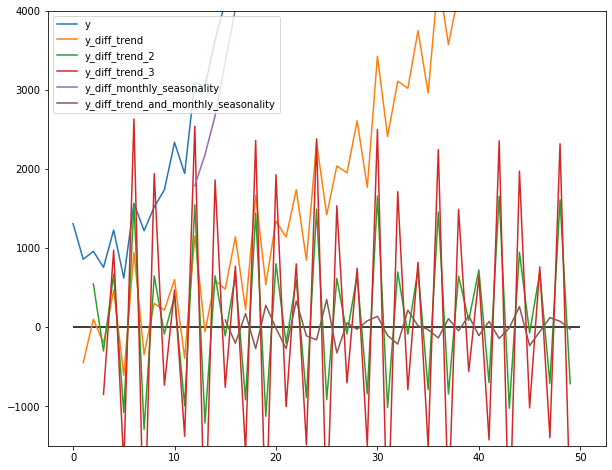

In [54]:
# setup timeseries that takes form:
# intercept + t**3 + month_seasonality + residuals
df['y'] = 1000 + df['t']**3 + df['s'] + df['r']

fig, ax = plt.subplots(figsize=(10, 8))

ax.hlines(0, 0, len(df))
ax.plot(df['t'], df['y'], label='y')

# remove 1st order trend
df['y_diff_trend'] = df['y'] - df['y'].shift(periods=1)
ax.plot(df['t'], df['y_diff_trend'], label='y_diff_trend')
print('t test for removing trend only')
print(ttest_1samp(df.dropna().y_diff_trend.values, 0))

# remove 2nd order trend
df['y_diff_trend_2'] = df['y_diff_trend'] - df['y_diff_trend'].shift(periods=1)
ax.plot(df['t'], df['y_diff_trend_2'], label='y_diff_trend_2')
print('\nt test for removing trend order 2 only')
print(ttest_1samp(df.dropna().y_diff_trend_2.values, 0))

# remove 3rd order trend
df['y_diff_trend_3'] = df['y_diff_trend_2'] - df['y_diff_trend_2'].shift(periods=1)
ax.plot(df['t'], df['y_diff_trend_3'], label='y_diff_trend_3')
print('\nt test for removing trend order 3 only')
print(ttest_1samp(df.dropna().y_diff_trend_3.values, 0))


# remove monthly season 
# this also removes trend because there is a trend materializing over 12 months
df['y_diff_monthly_seasonality'] = df['y'] - df['y'].shift(periods=12)
ax.plot(df['t'], df['y_diff_monthly_seasonality'], label='y_diff_monthly_seasonality')
print('\nt test for removing monthly seasonality only')
print(ttest_1samp(df.dropna().y_diff_monthly_seasonality.values, 0))

# remove month and season
df['y_diff_tms'] = df['y'] - df['y'].shift(1)
df['y_diff_tms'] = df['y_diff_tms'] - df['y_diff_tms'].shift(1)
df['y_diff_tms'] = df['y_diff_tms'] - df['y_diff_tms'].shift(1)
df['y_diff_tms'] = df['y_diff_tms'] - df['y_diff_tms'].shift(12)
ax.plot(df['t'], df['y_diff_tms'], label='y_diff_trend_and_monthly_seasonality')
print('\nt test for removing both trend order 2 and monthly seasonality')
print(ttest_1samp(df.dropna().y_diff_tms.values, 0))


plt.ylim(-1500, 4000)
plt.legend()
plt.show()